# Basics of Monte Carlo Simulations
Authors: Ralph Enderle, Marco Müller

# Table of Contents
* [Monte Carlo Simulations - What it is all about](#1)
* [How Monte Carlo Simulations work](#2)
* [The Law of Large Numbers](#3)
* [Central Limit Theorem](#4)
* [Monte Carlo Applied](#5)
* [Monte Carlo Integration](#6)
* [Markov Chains](#7)
* [Markov Chain Applied](#8)

![05_MonacoCasino.jpg](./imgs/09_MonacoCasino.jpg)

Casino Panoramio, a famous casino in Monte Carlo, Monaco; the city from which the Monte Carlo simulation has its name from.
Source: [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_Casino#/media/File:Casinò_-_panoramio.jpg)

<a id="1"></a>
# Monte Carlo Simulations - What it is all about 

Generally speaking, Monte Carlo simulations are all computational procedures, that rely on performing a random experiment over and over again and thereby extract important statistical information. Hence, it is a computer-aided numerical technique, that is based on random sampling, with the help of which we can calculate important mathematical properties, for which an analytical solution does not exist or would be extremely complicated to get. In order to do so, we express the property we are interested in as a parameter of a hypothetical population and then use random numbers in order to simulate different samples of the population, with the help of which we can obtain statistical estimates for our parameter of interest. As such, we would simulate a random experiment in a computer over and over again and thereby learn something about our estimate and its statistical properties. Consider for example the distribution function of a standard normally distributed random variable $X$: $P(X \leq x) = \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{1}{2}x^2} dx$. As you might know from a statistics course, there does not exist an analytical solution to this integral, which is why we need to compute it numerically. While there are many different techniques to numerically integrate such a function, the Monte Carlo integration method offers one alternative. Generally, Monte Carlo simulations are wildly used by both academics and professionals in many fields, such as physics, chemistry, economics, finance and many more. Its applications range from simulations of atoms collisions to simulations of traffic flows and even to the prediction of stock price indices. In the social sciences, the Monte Carlo simulation is a valuable tool to examine what results a particular course of action can bring, how probable those are and to quantitatively assess different risks.

The technique is named after the city of Monte Carlo in Monaco, which is famous for its casinos, where a lot of random experiments are carried out naturally (for an example of such a casino, see also the above picture). And since the technique involves the simulation of random experiments as well, it is therefore called "Monte Carlo Simulation". It was originally developed in 1944 during the Manhatten Project in the second World War at the Los Alamos National Laboratory in order to calculate neutron diffusions for the development of the atomic bomb. However, since its introduction during the Second World War, Monte Carlo simulations have been used over time to model many different physical and conceptual systems.

<a id="2"></a>
# How Monte Carlo Simulations work

Generally, a Monte Carlo Simulation requires the following steps ([Missouri University of Science and Technology, p. 2–5](http://web.mst.edu/~dux/repository/me360/ch8.pdf)):

1. Specify an underlying data generating process as the population distribution and draw a random sample of size $n$ from it. While we could perform an actual random experiment like throwing a coin or a dice, report their outputs and use them for our purpose here, modern computers generate random numbers by themselves by means of arithmetic random-generators. Due to their algorithmic nature, they are so called *pseudo random numbers*. These random variables will then be used as the input for the simulation. 

2. Using the simulated random variables, we then estimate the property of interest and draw again several samples, where we reestimate our quantity for every random sample. Hence, the results are recalculated again and again, each time using a different set of random values based on the assumed data generating process. These individual sets of samples are called *iterations* and in the end, we have a total of $m*n$ random variables, $m$ samples and therefore also $m$ estimates. Thereby, the Monte Carlo simulation generates an empirical distribution of our estimator and hence does not only result in the possible results, but also assigns these individual results a probability of occurence via the empirical distribution.

3. Finally, we can proceed to perfom statistical analysis in order to assess the statistical properties of our estimator. Since we know the data generating process, we could let $n$ go to infinity and check whether we have a consistent estimate for the property of interest, see to which value the estimator converges to and inspect how the standard deviation of the estimator behaves.       

These steps are again nicely summarized in the following flow chart: 

![05_LogicMC.png](./imgs/09_LogicMC.png)
Source: [Missouri University of Science and Technology, p. 2](http://web.mst.edu/~dux/repository/me360/ch8.pdf)


<a id="3"></a>
# Law of Large numbers (LLN) 

An important building block of Monte Carlo simulations is the Law or Large numbers. If we are given a sequence of random variables $(X_n)_{n \in \mathbb{N}}$, then almost always the sequence does not converge. However, we can get some information of how the mean of the sequence behaves. Intuitively speaking, when we consider the mean instead of the whole sequence itself, we would expect some kind of stabilizing behaviour, as the single random variables $X_i$ get less and less weight, if we increase the number $n.$ 
This intuition is exactly what the law of large numbers formalizes in the following theorem: 

Let $X_1,..., X_n$ be a sequence of independent random variables, each with an expected value of $E[X_i] = a < \infty$ and $Var(X_i) = b^2 < \infty$. Then, the LLN states that $\forall \epsilon > 0$

\begin{equation}
\lim_{n \to \infty} P(| \bar{X_n} - a | > \epsilon) = 0 ,
\end{equation}

where $\bar{X_n} = \frac{1}{n} \sum_{i=1}^n X_i$ denotes the mean. More compactly, we could also write $\frac{1}{n} \sum_{i=1}^n X_i \overset{p}{\to} a$ for $n \to \infty$. Note, that we did **not** assume, that the $X_i$ are identically distributed, we only assumed, that they have the same finite expected value and the same finite variance. The implications of the LLN are therefore strong and very useful, because it says, that when we are sampling randomly from a population, we don't need to specify the distribution of the random variables, but instead only need to argue that our sample draws have the same mean and variance. Then, by taking enough samples, we can get arbitrarily close to the first population moment $E[X_i]$, without speficying it in the first place. Why is this useful, you wonder? Well, mathematically, the expected value of a random variable $X$ is defined as $E[X] = \int_{-\infty}^\infty x dF(X)$, where $F(X) = P(X \leq x)$ denotes the cumulative distribution function of X. Hence, when we are computing expected values, we have to solve this (Riemann-Stieltjes) integral, which might be very complicated or even impossible to do analytically. In case the distribution function $F(x)$ is differentiable we can simplify the integral to a Riemann integral, such that the expected value is then given by: $E[X] = \int_{-\infty}^\infty x f(X)dx$, where $f(x) = \frac{\partial F(x)}{\partial x}$ represents the probability density function of $X$. Nevertheless, it still might be very complicated to calculate the latter integral analytically and in lots of real world applications, the assumption of differentiability is not even plausible.

Therefore, instead of trying to find a solution to the above integral in an analytical way, we can use the Law of Large numbers (if the conditions are satisfied) to get arbitrarily close to the expected value. The LLN is therefore really *the* basis of many Monte Carlo methods, as it guarantees that an appropriate Monte Carlo estimate is indeed a consistent estimate of the first population moment. Note that in Monte Carlo simulations we are assuming a particular data generating process, which implies that our randomly generated variables have the same expected value and the same variance and due to random sampling they are also independent, meaning that the LLN is applicable. We now illustrate the law of large numbers with the following intuitive example:  

Suppose I would suggest you the following game: I would throw a **biased** (i.e. unfair) coin and you could bet on either outcome. If you get it right, you win 1CHF and else you lose 1 CHF. However, I wouldn't tell you something about the probability distribution of getting heads or tails. Nevertheless, you are still eager to bet on either outcome, but first, you are allowed to inspect the coin. Now, you know that the probability of getting heads (or tails, respectively) follows a Bernoulli distribution with an unknown parameter $p$, representing the unknown success probability of getting heads. Therefore, we let $X_i$ be our random variable and define it as follows
\begin{equation} 
   X_i = \begin{cases} 
     1, & \text{if coin shows heads }  \\ 
     0, & \text{if coin shows tails } 
   \end{cases} 
\end{equation} 

The following code simulates our coin flipping experiment:

In [1]:
using Distributions, Plots, Random 
gr(fmt = :png, size = (900, 500))


# setting the seed 
Random.seed!(1234)

p = .3  # probability of getting heads (which I wouldn't tell you)
flips = 300 # number of coin flips

# Simulate coin flips following a Bernoulli distribution with parameter p
coin_flips = rand(Bernoulli(p), flips);

In our case, it is very easy to calculate the expected value, which is simply $E[X] = 1 p + 0 (1-p) = p$. But again, in real world applications, it might be much more complicated to derive the expected value analytically. However, now that we know what $E[X_i]$ represents here, namely the success probability $p$, we can use the law of large numbers to find out, how much $p$ really is. But first, we ask ourselves, whether the assumptions of the LLN in our example are satisfied? Well, the tosses are surley independent of each other and, in fact, they are even identical with both a finite mean of $p$ and a variance of $p(1-p)$. Therefore, we can apply the LLN. You now proceed to throw the coin several times and calculate the average number of heads, since you know that $\bar{X_n} \overset{p}{\to} E[X_i] = p$. 

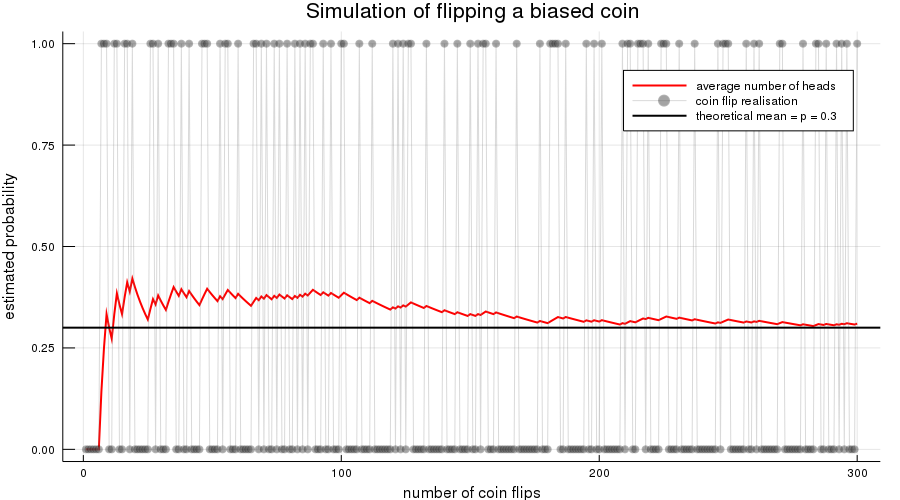

In [3]:
number_heads = cumsum(coin_flips)
average_heads = number_heads ./ (1:flips)


# make plot
plot(1:flips, average_heads, title = "Simulation of flipping a biased coin", label = "average number of heads", lw = 2, colour = "red", xlabel = "number of coin flips", ylabel = "estimated probability")
plot!(1:flips, coin_flips, label = "coin flip realisation", colour = "grey", markershape = :circle, alpha = 0.3)
hline!([p], color = :black, label = "theoretical mean = p = $p", lw = 1.5 )

Hence, after performing the experiment several times, the LLN assures you, that the average number of heads you get out of the experiment is converging in probability to the real (and to you unknown) success probability parameter $p$. Since we have calculated $p$ as an average of randomly simulated numbers, our algorithm is indeed a Monte Carlo method, where the LLN has assured us that our Monte Carlo estimate is a consistent estimate for the parameter $p$. And now that you know $p$, it is time for you to earn some money: you would always bet on heads, if $p > 0,5$ and on tails if $p<0.5$ and thereby earn more and more money, the more you play the game. Only if $p=0.5$, the game would be fair and in this case, you would on average neither earn, nor lose any money. 

### Explain it to Grandma 


Dear Grandma, suppose I perform a random experiment, like flipping a coin. Since we don't know, whether it will show heads or tails with certainty, this experiment involves randomness and is therefore indeed a random experiment. Intuitively, you could probably tell from experience, that there is a 50% chance of getting heads and a 50% chance of getting tails. Therefore, if we perform the exact same experiment several times, i.e. we flip the coin, say, 100 times, we should get around 50% of the flips heads and 50% tails. However, we might end up with maybe 48 heads and 52 times tails. Hence, we are only almost getting half of the times heads and tails, but not exactly yet. The law of large numbers now assures us, that if we would perform this experiment even more, say 1000 or 1'000'000 times, then we would get closer and closer to having exactly 50% heads showing up and 50% tails.  



<a id="4"></a>
# Central Limit Theorem (CLT) 

In economics and in the social sciences in general the normal distribution is one of the most wildly used distributions. The reason for the omnipresence of the normal distribution lies in the central limit theorem. In order to formally define it, we let $X_1,...,X_n$ be a sequence of jointly distributed random variables, each with a finite mean $E[X_i] = \mu_i$ and a finite standard deviation $\sigma(X_i) = \sigma_i$. Then, for the sum $S_n = X_1 + ... + X_n$, it holds:

\begin{equation}
\frac{S_n - E[S_n]}{\sigma(S_n)} \overset{d}{\to} N(0,1)
\end{equation}

In case $X_1,...,X_n$ are also identically distributed with $E[X_i] = \mu$ and $\sigma(X_i)= \sigma, \forall i$, then the central limit theorem states:

\begin{equation}
\frac{S_n - n \mu}{\sqrt{n} \sigma} \overset{d}{\to} N(0,1),
\end{equation}

which is equivalent to the following statement, that involves the mean $\bar{X_n}$, instead of the sum $S_n$:

\begin{equation}
\frac{\sqrt{n}(\bar{X_n} - \mu)}{\sigma} \overset{d}{\to} N(0,1) \Leftrightarrow \sqrt{n}(\bar{X_n} - \mu)\overset{d}{\to} N(0,\sigma^2),
\end{equation}

Therefore, the CLT states, that if we don't look at single random variables, but instead look at the sum or the average and properly normalize these quantities, then this sum or average converges in distribution to a standard normal distribution. The version of the CLT involving the mean ($\sqrt{n}(\bar{X_n} - \mu)\overset{d}{\to} N(0,\sigma^2)$) says, that if we draw several random samples, calculate the average each time and look at how far away this average value is from the true mean, then this distance between the true and the estimated mean follows a normal distribution with a variance of $\sigma^2$ (only if it had been multiplied by $\sqrt{n}$).

Why should this be useful, you ask? Well, assume that we don't know the distribution of the population, from which we are sampling randomly. If we can justify the assumption, that our random draws are iid distributed with a finite mean and a finite variance, then we know that the properly normalized sum or average is approaching a standard normal distribution, as we let the sample size $n$ go to infinity. Therefore, if we are interested in analysing a mean or a sum of random variables, we don't need to know the underlying distribution, since the CLT assures us, that we have a convergence in distribution for these quantities. Since sums and averages are considered often in statistics (e.g. in the context of point estimation problems), the normal distribution emerges very often as an appropriate limit law and the assumption of a normal distribution is therefore mostly justified. In the context of parameter estimation, the class of consistent and asymptotically normally distributed estimators (the CAN class) is, due to the CLT, quite dense and this allows us to compare different estimators in terms of efficiency with each other and to carry out hypothesis tests and build confidence intervals. In our context, we can especially adress these properties for our Monte Carlo estimates thanks to the CLT, because these are also often given by a mean or a sum. And again, if the CLT is applicable, we can also do this, if our population is not normally distributed and in fact, we don't even need to know the distribution of the population. This is the reason, why the CLT is so powerful. From a practical point of view, most statistics textbooks recommend a sample size of at least $n=30$, in order to apply the CLT.

Finally, we shall now visualize the CLT using Julia:

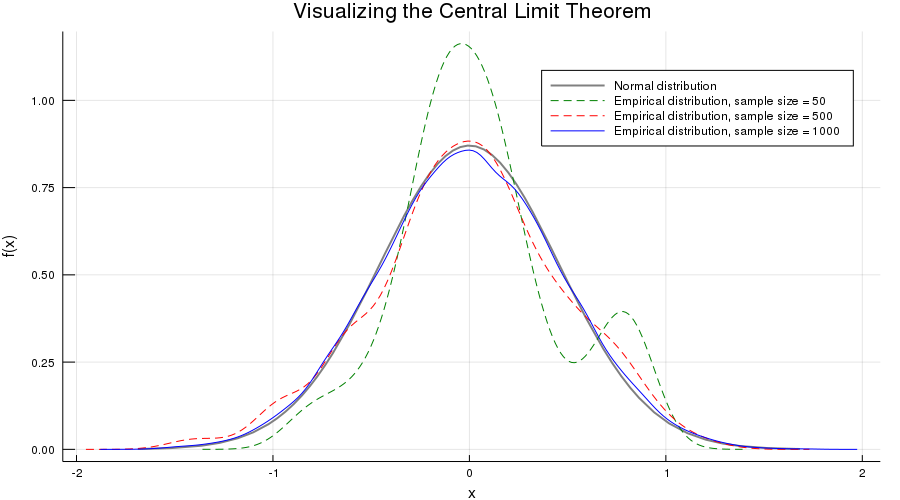

In [4]:
using Distributions, Plots, StatsPlots, Random
gr(fmt = :png, size = (900, 500))

# setting the seed 
Random.seed!(1)

# Initialize sample size and distribution
p = 0.3                # success probability
dist = Bernoulli(p)    # in this example, we let the X_i follow a Bernoulli distribution with parameter p
sample_size = 1000     # specify the sample size of one sample
sample_number = 10000   # specify how many samples we should draw

# Specify distribution parameters
μ = p               # the mean of X_i
σ = sqrt(p*(1-p))   # the standard deviation of X_i

# Create random sample
my_sample = rand(dist, sample_size, sample_number)

# Calculate the mean of each sample and create empirical distribution
sample_means = mean(my_sample, dims = 1) 
my_dist = (sqrt(sample_size)) * (sample_means .- μ) 
    
# Plot empirical distributions against a N(0,σ)
plot(Normal(0, σ), color = "grey", label = "Normal distribution", lw = 2, title = "Visualizing the Central Limit Theorem", xlabel = "x", ylabel = "f(x)")
density!(my_dist[1:50], color = "green", linestyle = :dash, lw = 1, label = "Empirical distribution, sample size = 50")
density!(my_dist[1:500], color = "red", linestyle = :dash, lw = 1, label = "Empirical distribution, sample size = 500")
density!(transpose(my_dist), color = "blue", lw = 1, label = "Empirical distribution, sample size = $sample_size")


Hence, as can be seen above, if we sample from a Bernoulli distribution and calculate the expression $\sqrt{n}(\bar{X_n} - \mu)$ from the CLT, then we can see, that this expression indeed approaches a normal distribution $N(0, \sigma^2)$, as we increase the sample size. 


### Explain it to Grandma 

Dear Grandma, let me tell you something about statistics. In order to work with probabilities, we define so-called probability functions and distributions, with the help of which we can address the probability of certain events, as for example the probability of getting a six, if I would throw a fair dice. In fact, there are quite a lot of different probability distributions. So, therefore, let me tell you, that it should be of no surprise, that when I encounter a random setting, I might not really know with which distribution I should work. This is where the CLT comes into play: Instead of considering each outcome of the experiment by its own and wondering about its distribution, I would tell myself: "Hey, let's just consider the sum or the average of those outcomes", because I know, that I can do some easy adjustments of these quantities and then the CLT assures to me, that they follow a very important distribution, that is encountered a lot in statistics; the so-called normal distribution. So, it doesn't matter that I don't know the individual distributions, if I want to consider a sum or an average of them, because I know the distribution of the sum or the average, thanks to the CLT. Putting it a bit shorter, the CLT states that the distribution of the sample mean (or, equivalently, the sum of the sample values) approaches a normal distribution with increasing sample size, if the latter quantities have been transformed correctly.

<a id="5"></a>
# Monte Carlo Applied
To honour the name Monte Carlo and to show an applied example, we have decided to simulate the game of **roulette**. In doing so, we first have to simulate the game. For the function **playRoulette()** the French rules are used. For simplicity reasons, we define all numbers above 18 as red. Additionally, all players will always play the colour red. This approach is acceptable, since switching colours will not change the likelihood of winning for the players. The house wins, if the result is black or 0. 

In [5]:
#Function that simulates roullet according to the French rules.  

function playRoullete()
    #Simulation of a game of roulette. All numbers between 0 and 36 are drawn with equal probability.
    roll = rand(0:36)
   
    #If the player wins, the function returns true. If the player loses, false is returned.
    if roll == 0
        return false
    elseif roll > 18
        return true
    else 
        return false
    end
end

playRoullete (generic function with 1 method)

Roulette needs not only a table to play but also players. The below **betting()** function simulates a player. The variable **'funds'** defines how much money the player has. The **'bet'** variable defines how much the player bets per round played. The **'numberBets'** variable defines the number of games played.

In [6]:
#This function simulates a player. 

function betting(funds, bet, numberBets)
    
    #Stores the games number from first to last game played
    xValues = []
    #Stores the remaining funds after each game played
    yValues = []
    
    #used to keep track of the number of games played
    betCounter = 1
    
    while betCounter <= numberBets
        #increases the players funds if he wins
        if playRoullete()
            funds += bet
        #decreases the players funds if he loses
        else 
            funds -= bet   
        end
        
        #Takes the updated funds / iteration number and pushes them to the prepared empty lists
        push!(xValues, betCounter)
        push!(yValues, funds)
        
        betCounter += 1
    end
    
    #returns the time series of the development of the funds 
    return xValues,yValues
    
end

betting (generic function with 1 method)

The **createPlots()** function takes the parameters **'numberPlayers', 'funds', 'bet'** and **'numberBets'** to define the number of players in the simulation, the funds each player has, the amount each player bets per round and the number of sequential bets played. These parameters are then used to execute the betting function, **simulate** the games and **plot** the results.  

In [7]:
#parameters of the simulation

numberPlayers = 100 #the number of simulated players
funds = 10000 #the simulated amount of cash each player holds
bet = 100 #the cost of a lost bet and the win of a won bet
numberBets = 100 # the number of bets placed per player

#This function takes the above defined parameters and executes the betting function to simulate the games
#and then plots the results.

function createPlots(numberPlayers, funds, bet, numberBets)
    
    #Execute betting function and create the initial plot
    xValues, yValues  = betting(funds, bet, numberBets)
    plot(xValues, yValues, xlab = "numberBets", ylab = "funds", label = "", linecolor = "blue")
    
    #Execute betting function (numberPlayers-1) times and add the results to the created plot
    for i in 1:(numberPlayers-1)
        xValues, yValues  = betting(funds, bet, numberBets)
        plot!(xValues, yValues, label = "", linecolor = "blue")
    end
    
    plot!(1:length(xValues), (1:length(xValues))*.0, label = "", linecolor = "red")
    
    #display the created plot
    display(plot!())
end


createPlots (generic function with 1 method)

Now we are set up for the simulation. Initially, we simulate 100 players, playing 100 rounds of roulette each, betting 100 per round with the option to win 100. The below graph is insofar interesting as there is **no clear tendency** visible yet. There are quite a few people who **made money** even though we know that the game is **rigged** in favour of the bank. Maybe we haven't played enough rounds yet?

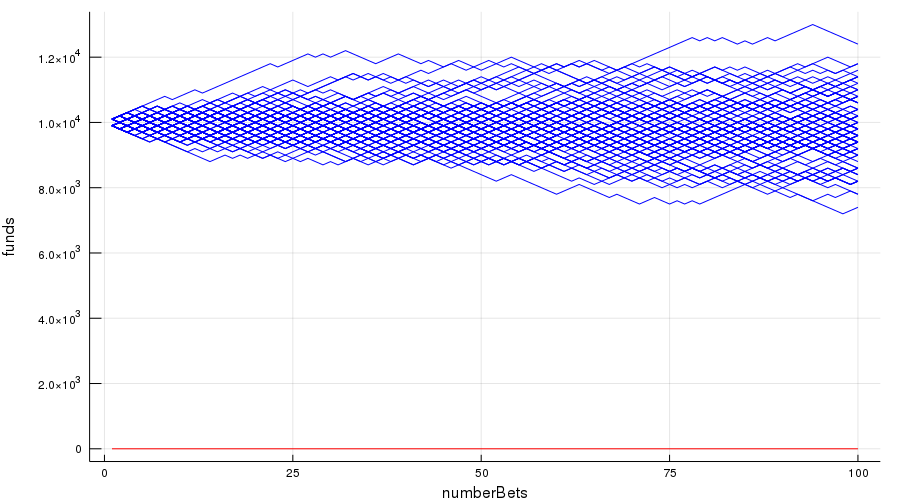

In [8]:
createPlots(numberPlayers, funds, bet, numberBets)

Now we simulate again 100 players, betting 100 per round with the option to win 100. However, each player will now do 1000 sequential bets. Looking at the below graph, after 1000 rounds there is a **downwards tendency** visible. Nonetheless, there are still players that have **increased** their initial funds.

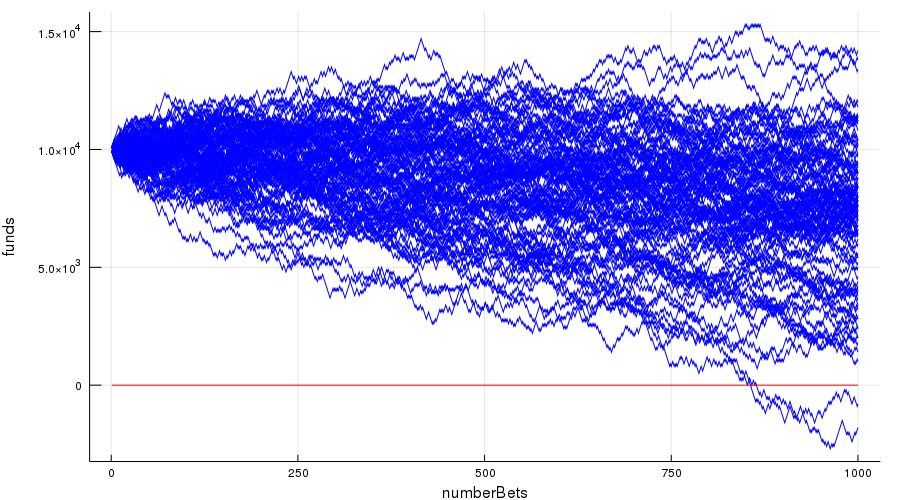

In [9]:
createPlots(numberPlayers, funds, bet, 1000)

To make the effect more visible we increase the number of rounds played to 10000 ceteris paribus. After 10000 rounds there is a **strong downwards tendency** visible. Most players can now be found below the red line at 0. These players have **lost** all their initial capital of 10000. The blue lines below the red line at 0 are the debts that they would have accumulated if they had kept playing.

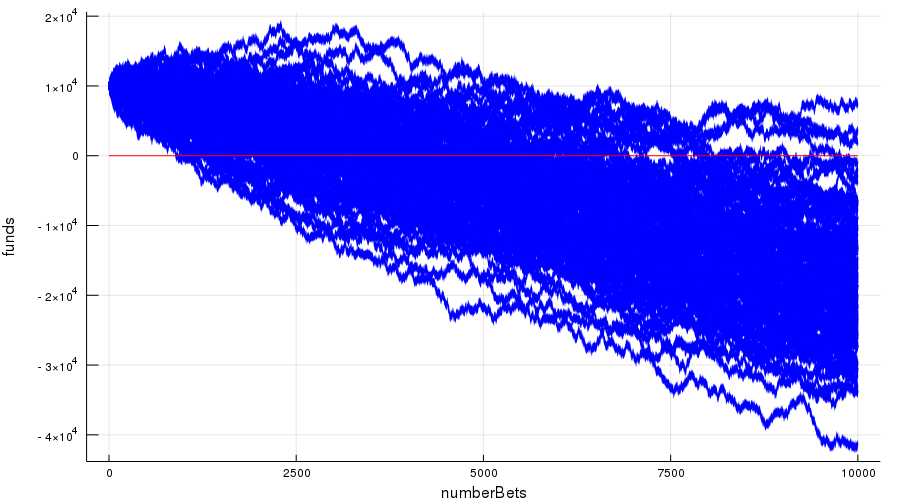

In [10]:
createPlots(numberPlayers, funds, bet, 10000)

*What is the power of the Monte Carlo Simulation method shown with this example?* From the outside, in the short to mid term, it looks as if there are **hyper succesfull** roulette players that outperform everybody else. This makes other people belief that there might be a trick to it. Also, people use pseudo statistics like: "The ball stopped five times at black, the next one has to be red", even tough the chances remain the same. **Monte Carlo shows the truth hidden in large numbers of trials**. These hyper succesfull players are statistical coincidences. The truth is, nonregarding the variance an oddities, **the bank wins** always if you play long enough.

<a id="6"></a>
# Monte Carlo Integration

In this chapter we want to adress another important and often encountered Monte Carlo Method, that is used to solve integrals numerically: the so called *Monte Carlo Integration*. Since this method also relies on simulating random numbers and using them to get an estimate of a mathematical expression, this is indeed a Monte Carlo method. 

In the introductory text above, we have mentioned, that we cannot evaluate the distribution function of a standard normally distributed random variable $X$ analytically, but **only numerically**. With the help of this Monte Carlo method, we want to tackle this issue now. Hence we want to calculate the following probability for a specific $x \in \mathbb{R}$, which is given as the following integral: $P(X \leq x) = \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{1}{2}x^2} dx $.

The Monte Carlo integration method suggests, that we first take uniformly distributed random numbers $x_i$ from the interval, where we want to calculate the integral. In our case, the interval would be $(-\infty,x]$, but since we cannot consider the whole negative real line, we restrict ourselves to the interval $[-4, x]$, as the density function at -4 and below is almost 0, so that we should not make any big approximation errors. We would then evaluate the function inside the integral at all this random numbers and calculate the mean value of this values. So in our case, we would take the randomly drawn numbers from the interval $[-4, x]$ plug them into the density function of a standard normal distribution, i.e. plug them into $\phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2}$ and calculate the mean value of all these realizations. This gives us the mean value of the function we are integrating. Finally, we would just multiply this mean value by the length of our interval to get the Monte Carlo estimate of the integral. Thereby, the Law of Large numbers assures to us that the Monte Carlo estimate is indeed a consistent estimate for the integral.  


In the following Monte Carlo simulation, we have shown this for the case of $x=1.9$, meaning that we want to evaluate the integral $\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{1.9} e^{-\frac{1}{2}x^2} dx $. If one considers a statistical table containg the values of integrals of this form, one can read $\Phi(1.9) = 0.97128$. Let's check how good we can approximate this value with our method:

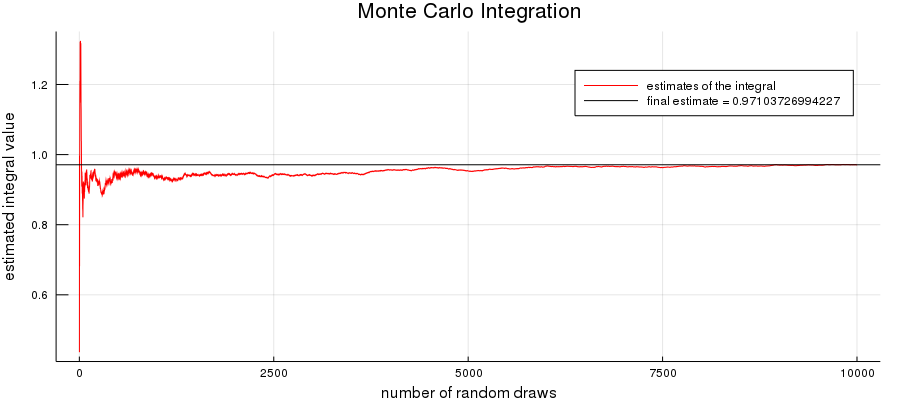

In [11]:
using Random, Distributions, Plots
gr(fmt = :png, size = (900, 400))


Random.seed!(2)


# define lower and upper bound of the integral. Instead of -infinity, we just choose -3, as the density is almost 0 there and below
lower_bound = -4
upper_bound = 1.9

# define number of random draws
random_draws = 10000

# draw uniform random numbers from the above specified interval
random_number = rand(Uniform(lower_bound, upper_bound), random_draws)

# calculate the density functions evaluated at the randomly drawn points
density_values = zeros(random_draws)
for i = 1:random_draws
    density_values[i] = (1 / sqrt(2*pi)) * exp(-0.5 * random_number[i]^2)
end

# calculate the average to get an approximation for the integral
final_estimate = mean(density_values) * (upper_bound - lower_bound)

# For plotting the convergence pattern, calculate the estimate for each random point that was added
intermediate_estimates = cumsum(density_values) ./ (1:random_draws) * (upper_bound - lower_bound)


# Plot convergence
plot(1:random_draws, intermediate_estimates, title = "Monte Carlo Integration", label = "estimates of the integral", xlabel = "number of random draws", ylabel = "estimated integral value", lw = 1, colour = "red")
hline!([final_estimate], color = :black, label = "final estimate = $final_estimate", lw = 1.5 )

We can observe a really nice pattern of convergence and the final estimate of 0.97103 is quite close to the value suggested in the tables (0.97128). Therefore, we conclude, that the Monte Carlo integration is another powerful Monte Carlo Simulation based method, that we can use to calculate integrals numerically. 

<a id="7"></a>
# Markov Chains

Finally, in this last part of our tutorial, we shall consider Markov chains and how they relate to Monte Carlo Simulations. Let us start with some key definitions: 

*Definition:* A $nxn$ Matrix $P$ is called a **Markov matrix**, if the following holds: 
1. $p_{ij} \geq 0, \qquad \forall p_{ij} \in P, $
2. $\sum_{j=1}^n p_{ij} = 1, \qquad \forall i $

Hence, we need every entry in the matrix to be positive and each row summing up to 1. Therefore, we can interpret each row as a probability function over the $n$ different states, represented by the columns of the matrix, so that we have in total $n$ different probability distributions over the state space represented by the columns. Next, we need to define what a Markov chain is.

*Definition*: Let $\Omega = \{x_1,...x_n\}$ be a finite state space. A **Markov chain** is a stochastic process (i.e. a sequence of random variables $X_t: \Omega \to \mathbb{R}$), that has the Markov property: 
\begin{equation}
P(X_{t+1} = x_{t+1} | X_t = x_t,...., X_0 = x_0) = P(X_{t+1} = x_{t+1} | X_t = x_t)
\end{equation}

Hence, the conditional probability that the random variable $X_{t+1}$ takes on some value $x_{t+1}$ given all previous realisations $x_t,...,x_0$ is equal to the probability of $X_{t+1} = x_{t+1}$, conditioned just on the previous value $x_t$. This property is also called *memoryless property*, as just the previous realisation of the random variable needs to be taken into account, when assigning a probability to any future state. We don't need to take into account the full path of the random variable in the past, but can instead just consider the previous realisation. We can represent this conveniently in a Markov Matrix: 

\begin{equation}
P=
\begin{pmatrix}
P(x_1, x_1) & ... & P(x_1, x_n) \\
\vdots & \ddots & \vdots \\
P(x_n, x_1) & ... & P(x_n, x_n)
\end{pmatrix}
,
\end{equation}


where each entry represents the probability of moving from the row to the column state. Hence $P(x_i, x_j) = P(X_{t+1} = x_j | X_t = x_i)$ denotes the probability to end up in state $j$, given that we are currently in state $i$. Note, that due to the Markov property, it does not matter which values have been realized before, we only need to condition on the current value $x_t$. So what does this matrix represent now exactly? Well, consider row $i$. This means that we are currently in state $i$ (i.e. $X_t = x_i$) and, given that current value, the row gives us the whole conditional probability distribution to move from this state to any other state $x_1,...,x_n$. Since there are $n$ possible current values for $X_t$, we get 1 conditional probability distribution for each row and therefore $n$ in total, meaning that each row can be thought of as a probability distribution. In the following, we shall denote the probability distribution of being in a particular state $x_{t+1}$ as $P(X_{t+1} = x_{t+1}) = \psi(x_{t+1})$

Moreover, we know from statistics, that the probability $P(X_{t+1} = x_{t+1})$ that our random variable $X_{t+1}$ takes on any particular value $x_{t+1} \in \Omega$ at time $t+1$ is given by: $P(X_{t+1} = x_{t+1}) = \sum_{x \in \Omega} P(X_{t+1} = x_{t+1} | X_t = x_t) P(X_t = x_t)$. Therefore we can write the proabability distribution $\psi_{t+1}$ to be in a particular state $x_{t+1}$ at time $t+1$ as:

\begin{equation}
\psi(x_{t+1}) = \sum_{x \in \Omega} P(X_{t+1} = x_{t+1} | X_t = x_t) \psi(x_t)
\end{equation}

The above equation holds for a particular state $x_{t+1} \in \Omega$ and hence there is one such equation for all possible states. This gives rise to the following system of equations: 


\begin{equation}
\begin{pmatrix}
\psi_{t+1}(x_1) \\ 
\vdots \\
\psi_{t+1}(x_n)
\end{pmatrix}
=
\begin{pmatrix}
P(x_1, x_1) & ... & P(x_1, x_n) \\
\vdots & \ddots & \vdots \\
P(x_n, x_1) & ... & P(x_n, x_n)
\end{pmatrix}
\begin{pmatrix}
\psi_{t}(x_1) \\ 
\vdots \\
\psi_{t}(x_n)
\end{pmatrix}
\end{equation}

Or, a bit shorter, we write $\psi_{t+1} = P \cdot \psi_t$. Let's stop here for a quick moment and look at what we have: On the left handside of the above equation, we have a vector summarizing the probabilities that our random variable $X_{t+1}$ is in one particular state of $\Omega$ at time $t+1$. The first entry, for example, would tell us the probability to be in state 1 at time $t+1$, i.e. that our random variable $X_{t+1}$ takes on the value $x_1$ for its $(t+1)$th realization $x_{t+1}$. Then the equation tells us, that I can get this probabilitiy for time $t+1$ quite conveniently, insofar as I just need to multiply the first row of my Markov matrix by the probability vector for time $t$. 
Therefore, If we were given a Markov matrix $P$ and an inital vector $\psi_t$, we could easily calculate the proabilitiy distribution over the different states at any time $t+n$ by just multiplying $n$ times our Markov matrix with this initial vector, because it holds: $\psi_{t+1} = P \cdot \psi_t$ and $\psi_{t+2} = P \cdot (P \cdot \psi_t) = P^2 \cdot \psi_t$ and so on until $\psi_{t+n} = P^n \cdot \psi_t$.

Now, if at some point $k$, we get that $P^k = I_n$ is equal to the identity matrix, then multiplying $\psi_t$ by $P$ to get $\psi_{t+1}$ won't change the result any further. At this point it holds: $\psi^* = P \cdot \psi^*$ and the distribution $\psi^*$ over the state space is called a **stationary** distribution for the Markov matrix $P$. In this case, we have reached the *equilibrium* distribution. 

This is now very convenient, because if we encounter a stochastic process defined on a finite state space, that has the Markov property, we can represent this in a Markov matrix and easily simulate the dynamics of this system. We just need to create our Markov matrix and assume some current distribution, which we can usually measure or estimate from some data, as it is the current one. Then we can simply multiply this vector containing the current probability distribution over the state space by our matrix over and over again to see where the process develops to. By doing this several times, we can then see, to what final probability distribution the process converges to and hence what the equilibirum distribution looks like.  

But does every Markov matrix have such a stationary distribution $\psi^*$? Can we be sure, that we will get any information about the equilibrium distribution by simulating the dynamics as described above? Yes! Thanks to the following theorem. 

**Theorem:** If we consider a finite state space $\Omega = \{x_1,...,x_n\}$, then every Markov matrix $P$ over that state space has *at least one* stationary distribution.

So the theorem assures us, that we have *at least one* stationary distribution, but we could still have several. From a predictive point of view, this is certainly not what we were hoping for, as we would like to tell exactly to which distribution we converge to. To address this issue, we need to introduce again 2 more definitions: 

*Definition:* 
The matrix $P$ is called **irreducible**, if it holds: $P^j(X_{t+1} = y | X_t = x) > 0$ and $P^k(X_{t+1} = x | X_t = y) > 0,  \forall j,k$. All states are then said to communicate with each other. It does not matter which state we are currently in, irreducibility assures us that we can reach any state within a finite number of steps. 


*Definition:* We call $P$ **aperiodic**, if all states have a period of 1, i.e. if it holds that the greatest common divisor of the set ${P^j(x_i,x_i)>0}$ is equal to one for all states $x_i \in \Omega$.


Equipped with these last two definitions, we get the following theorem: 

**Theorem**: Given a Markov matrix $P$ that is aperiodic as well as irreducible, then there exists a *unique* stationary distribution and by multiplying $P^k$ with the initial distribution $\psi_0$ for large k, we are sure that we converge to this distribution. Hence: $P^k \psi_0 \overset{d} \to \psi^* (k \to \infty)$. 


Therefore, if we are given a Markov matrix $P$ in practice and can verify the above conditions, then we can be sure, that there exists a unique equilibrium distribution and by multiplying the initial random vector with $P$ over and over again, we can also easily figure it out.


## Explain it to Grandma

Hi, Grandma. I know, this all sounds very complicated, but what a **Markov matrix** is can easily be shown at the hand of an example. Today we want to simulate employment and unemployment in the labour market. To do so, we need a **Markov matrix**. Since we are talking about the labour market, the matrix describes the probability to change between employment and unemployment. The value 0.8 in the below matrix signifies the probability of a worker who has a job to remain employed. Logically, the next value to the right (0.2) signifies the probability of an employed person to become unemployed. This is also the reason why all rows in a **Markov matrix** have to sum up to 1, because a chance to remain employed of 0.8 and a chance to lose the job of 0.2 sum up to 1. Because you can only be employed or unemployed, this just means that you are in one of those states with certainty. Similarly, the value 0.3 in the second row signifies the probability for an unemployed person to find a job. The value to the right (0.7) therefore signifies the probability that an unemployed person remains unemployed.

  -   | E | U
  ------------- | ------------- | ------------- 
  E  | 0.8  | 0.2
  U  | 0.3 | 0.7
  
The intuition behind **Markov chains** can be intuitively shown, as well. To do so, we will make a small simulation. We will simulate 12 months of employment/unemployment for a person with the help of the **Markov matrix**. The person starts with a job. So we have in the first month a look at the **Markov matrix** and roll a ten-sided dice. If the dice rolls 9 or 10 the person loses the job, otherwise he/she remains employed. These are the probabilities described by the first row of the **Markov matrix**. We roll a 5. The person remains employed and we play the game again in period 2. In period 2, we roll an 8. Therefore, the person has lost her job and is now unemployed. This means for us that we have to use from now on the probabilities in the second row of the table. We roll the dice and get a 3. The simulated person was lucky and got rehired in period 3. The **Markov chain** is thus the sequence of random results that we created by using the **Markov matrix**. At this point, also note that we simulated these dynamics with the help of random numbers, in order to find out, how the process develops. This is therefore indeed a Monte Carlo Simulation again.

If you still struggle with the concept, please find the same explanations in the code below. We used a code snippet from the lecture and added very detailed commnents on what is happening at all stages in the code. 

In [12]:
using Distributions

#Markov matrix -> same matrix as explained above

P = [0.8 0.2; #adds up to 1
    0.3 0.7] #adds up to 1


#Markov chain

#Markov chains are essentially a representation of how a random variable changes from one state to another over time.

state_values = ["Employed", "Unemployed"] # a person can be employed or unemployed
initial_state = 1 #intitally the person is employed as indicated by 1
T_simulation = 12 #the simulation runs over 12 periods

# Create an array with Categorical Distributions 0.8, 0.2 and 0.35, 0.65
myP = [Categorical(P[1,:]), Categorical(P[2,:])]

# initializes a vector with twelve 1s for the results of the simulation to be written into
simulated = fill(initial_state, T_simulation)

#The employee starts with 1 (employed). Based on the state (employed, unemployed) the first row or second row
#of the Markov matrix is used to randomly simulate next state.
for t = 2:T_simulation
    simulated[t] = rand(myP[simulated[t-1]]) 
end

simulated = state_values[simulated] # the reuslt is an array with all the states the person was in


12-element Array{String,1}:
 "Employed"  
 "Employed"  
 "Employed"  
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Unemployed"
 "Employed"  

Now, let us consider, whether we can find out, what the equilibrium distribution will look like. For this purpose, we can use the theory from above and multiply our Markov matrix $P$ over and over again with the initial distribution vector given as $x = (1,0)$. Note, that we have assumed that the worker is initially employed.

If we do this, we can indeed see, that there is an equilibrium distribution, which says that we have a chance of 60% that our worker is employed and a chance of 40% that he is unemployed. 

In [13]:
# simulate equilibrium distribution

# initialize values
initial_dist = [1 0]
number_periods = 25

# calculate stationary distribution
equ_dist = initial_dist * (P^number_periods)
equ_dist


1×2 Array{Float64,2}:
 0.6  0.4

<a id="8"></a>
# Markov Chain Applied
Since we have familiarized ourselves with the game roulette, we will use Markov chains to explore the **gamblers ruin**. The concept of the gamblers ruin states that a persistent gambler with **finite** wealth, playing a **fair game** will eventually and inevitably go broke against an opponent with **infinite** wealth. Hence, because a player is limited by a budget, but the casino is not, the casino will win because the player can go bankrupt. But what happens if we define a clear budget and have an exit strategy?

Assumptions: We assume that our gambler brings either 25 or 50 units of money to the roulette table. If he reaches 0, he will **stop** gambling. Similarly, if he reaches 75 he will take the winnings and **leave**. At each spin, he places 25 on red. If he wins, his wealth goes up 25. Alternatively, if he loses, his wealth reduces by 25. The chances to win/lose each round are 50% for both events. Of course, roulette is normally favouring the bank, but we will ignore this fact because the gambler's ruin assumes a **fair game**.

Out of this information we can build a **Markov matrix**. There are two **fixed states**. If our player reaches 0 or 75, he will stop playing. Hence, we can fix the state by assigning 1. If the player is at 25 he can switch states to 0 or 50 with a 50% chance each. Similarly, if the player is at 50 he can switch states to 25 or 75 with a 50% chance each. 

   - | 0 | 25 | 50 | 75
------------- | ------------- | ------------- | ------------- | -------------
**0**  | 1  | 0  | 0  | 0
**25**  | .5  | 0  | .5  | 0
**50**  | 0  | .5  | 0  | .5
**75**  | 0  | 0  | 0  | 1

In [14]:
#Markov matrix
#this is the above explained Markov matrix
P = [1 0 0 0; 
    0.5 0 0.5 0;
    0 0.5 0 0.5;
    0 0 0 1]

#Markov chain

#this vector describes the initial state when the player enters the casino with 25 money units
initialFunds25 = [0 1 0 0]
#this vector describes the initial state when the player enters the casino with 50 money units
initialFunds50 = [0 0 1 0]

#the game will be run over 20 periods
power = 20

#this function takes the Markov matrix, a vector representing the initial funds and the rounds played as inputs.
#the output is a matrix filled with vectors. Each vector describes the probability of the player to be in 
#one of the four states (0,25,50,75) in a given round.
function rouletteMarkov(markovMatrix, initialFunds, power)
    
    resultMatrix = Matrix{Float64}(undef, power, 4)#initialize empty matrix
    
    for i in 1:power
        # calculate output vectors with probabilities for the four states
        result = initialFunds * markovMatrix^i 
        
        #write findings into the resultMatrix
        for j in 1:4
            resultMatrix[i,j] = result[j] 
        end
    end
    
    return(resultMatrix)
    
end

#simulate the development once for 25 and once for 50 units of money
result25 = rouletteMarkov(P, initialFunds25, power)
result50 = rouletteMarkov(P, initialFunds50, power)

#quickly check the results to see if everything is ok
result50[1:3,1:4]

3×4 Array{Float64,2}:
 0.0   0.5    0.0   0.5  
 0.25  0.0    0.25  0.5  
 0.25  0.125  0.0   0.625

This function takes the Markov matrix, a vector representing the initial funds and the rounds played as inputs. The output is a matrix filled with vectors. Each vector describes the probability of the player to be in one of the four states (0,25,50,75) in a given round. The simulation is run for 20 periods. 

In [15]:
function plotMarkov(resultMatrix, power, title)
    
    #set-up initial plot 
    plot(1:power, resultMatrix[1:power,1], label = "State: 0", linecolor = "red", 
        xlab = "Number of rounds played", ylab = "Probability of states being true", 
        title = title)
    
    #add the development of the other states to the plot
    plot!(1:power, resultMatrix[1:power,2], label = "State: 25", linecolor = "green")
    plot!(1:power, resultMatrix[1:power,3], label = "State: 50", linecolor = "blue")
    plot!(1:power, resultMatrix[1:power,4], label = "State: 75", linecolor = "orange")

    #display the created plot
    display(plot!())
end

plotMarkov (generic function with 1 method)

This function is used to create two plots. The first plot shows the results for a player that starts playing roulette with initially 25 units of money. The second plot shows the results for a player that starts playing roulette with 50 units of money.

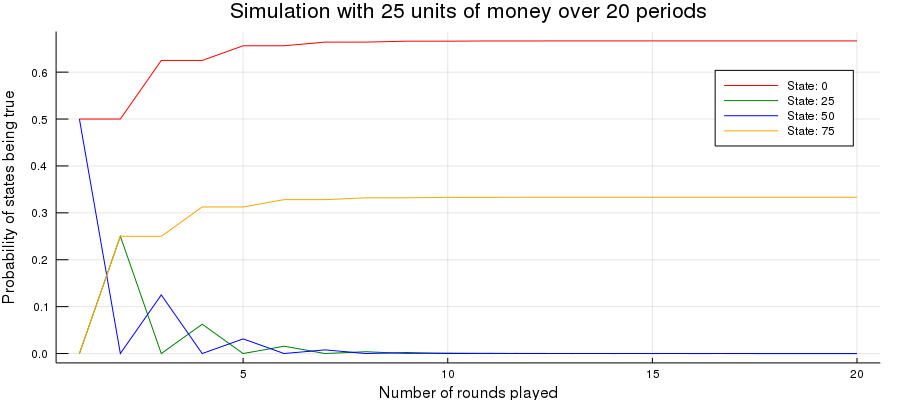

In [16]:
using Plots
plotMarkov(result25, power, "Simulation with 25 units of money over 20 periods")

This graph visualizes the result of our simulation. The x-axis shows the number of rounds played. The y-axis shows the probability to be in one of the **four states**. In this graph, our player entered the Casino with **25** units of money and we calculated all possible events over 20 games. The **red** line shows the **ongoing probability** of losing all money. In the first round, the probability is 0.5 since it is only one step from 25 to 0. The red line stays flat for one period because in round two the player must have won if he did not go bankrupt. The player, therefore, possesses 50 units of money in round two and thus cannot go bankrupt within 1 step. In period three the chance of having gone bankrupt increased to above 0.6. Going forward, the chance of going bankrup approximates **0.66**. The chance to go home with 75 units of money, as depicted by the orange line, approximates **0.33**. Therefore, within a few rounds, the states 25 and 50 have shown to be **instable** and have collapsed to either the states 0 or 75.

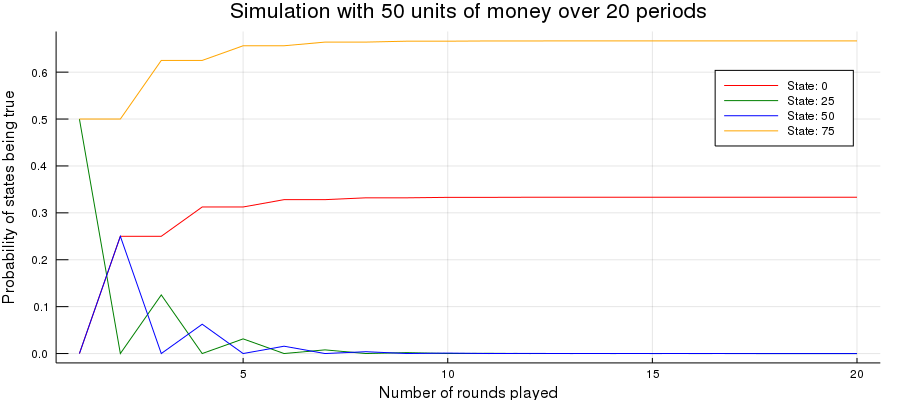

In [17]:
plotMarkov(result50, power, "Simulation with 50 units of money over 20 periods")

This graph follows the same build up. The only thing that has changed is that the player now enters the roulette game with initially **50** units of money instead of 25. The results are, however, quite different. The player now leaves the casino with 75 units of money with a probability of **0.66**. The chance to lose all the money has therefore dropped to **0.33**. This is the inverse of what we have seen in the first graph. The reason for this is that it takes now fewer steps to reach our upper limit then it takes to lose all the money. 

What have we learned from this simulation? If we play roulette or any other game of chance in a casino, time is our enemy because we have, unlike the casino, **budget constraints**. This disadvantage holds true even if we are playing a **fair game** against the casino. However, the above simulations have shown that we can easily avoid the **gamblers ruin** by setting us a **modest upper limit**. By setting us a reasonable upper limit, the probability of losing will not go to 100% anymore over time. In our first example, the probability of losing converged at 0.66% and in our second example the probability of losing converged at 0.33%. The reason for this movement away from losing 100% is based on setting more modest limits in comparison to the size of the gambling budget. 